In [1]:
%matplotlib inline

In [2]:
from kid_readout.measurement import basic
from kid_readout.measurement.io import nc

In [3]:
ncf = nc.NCFile('/data/detectors/2016-05-10_124955_lo_scan.nc')

In [4]:
scan = ncf.Scan0

In [11]:
scan.class_name()

'SweepArray'

In [5]:
scan.frequency.size

204800

In [15]:
np.sum([sa.s21_raw.size for sa in scan.stream_arrays])

52379136

In [16]:
np.sum([np.isnan(sa.s21_raw).sum() for sa in scan.stream_arrays])

0

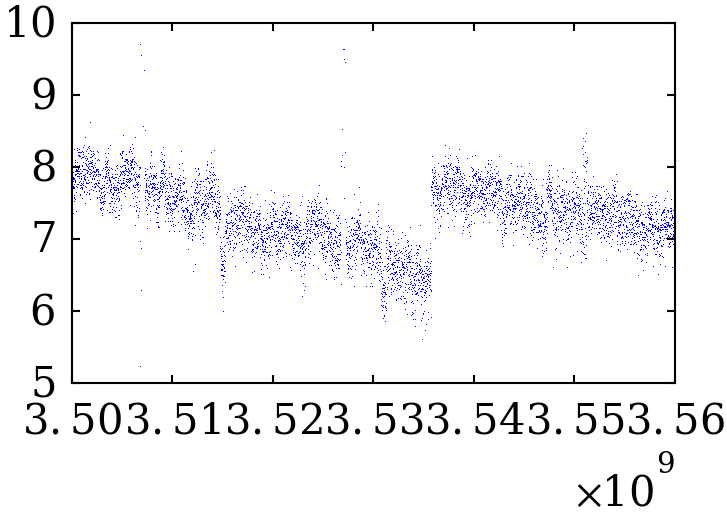

In [12]:
fig, ax = plt.subplots()
ax.set_ylim(5, 10)
ax.set_xlim(3.5e9, 3.56e9)
ax.plot(scan.frequency, 20 * np.log10(np.abs(scan.s21_point)), ',')

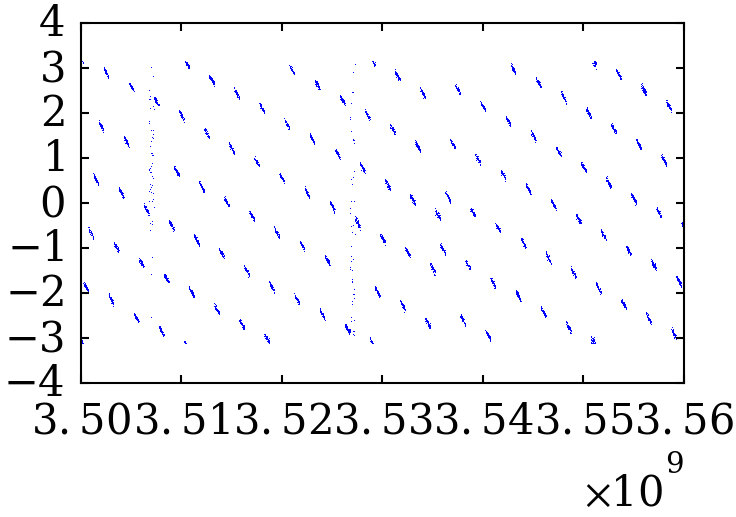

In [13]:
fig, ax = plt.subplots()
ax.set_xlim(3.5e9, 3.56e9)
ax.plot(scan.frequency, np.angle(scan.s21_point), ',')

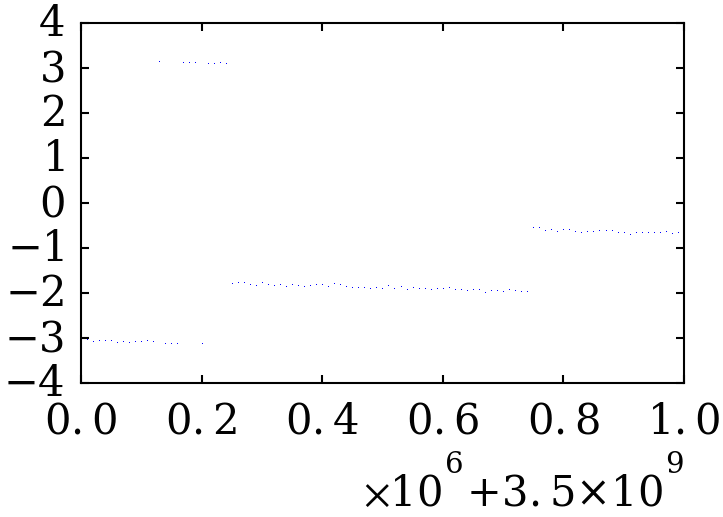

In [7]:
fig, ax = plt.subplots()
#ax.set_ylim(-10, 25)
ax.set_xlim(3.5e9, 3.501e9)
ax.plot(scan.frequency, np.angle(scan.s21_point), ',')

In [8]:
np.diff(scan.frequency).max()

10000.000000238419

In [9]:
np.diff(scan.frequency).min()

9999.9999997615814

In [21]:
scan.num_channels

128

In [22]:
swp0 = scan[0]
swp63 = scan[63]

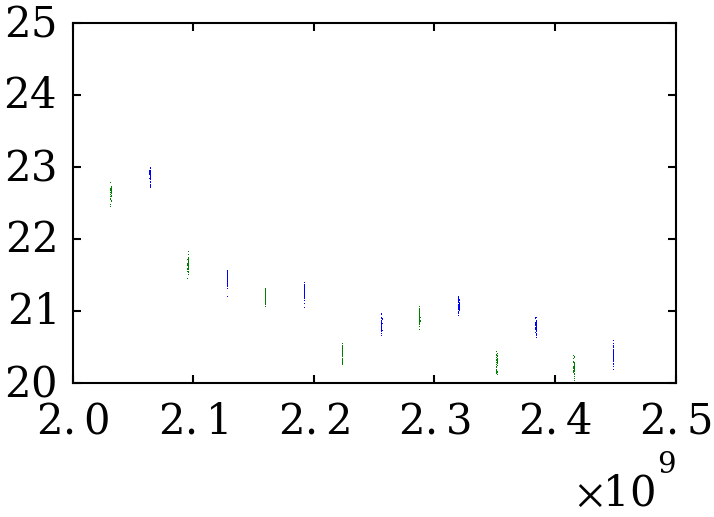

In [25]:
fig, ax = plt.subplots()
ax.set_ylim(20, 25)
ax.set_xlim(2e9, 2.5e9)
ax.plot(swp0.frequency, 20 * np.log10(np.abs(swp0.s21_point)), ',')
ax.plot(swp63.frequency, 20 * np.log10(np.abs(swp63.s21_point)), ',')

In [35]:
len(swp0.streams)

1600

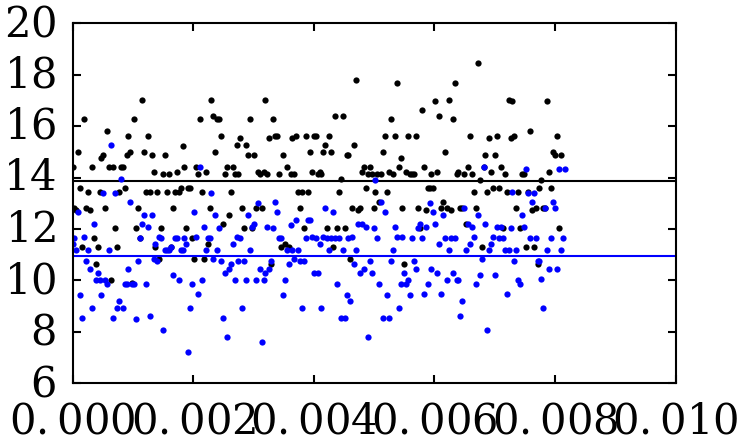

In [36]:
fig, ax = plt.subplots()
ax.set_xlim(0, 0.01)
st0 = swp0.streams[0]
st100 = swp0.streams[100]
ax.plot(st0.sample_time, np.abs(st0.s21_raw), '.k')
ax.axhline(np.abs(st0.s21_raw_mean), color='k')
ax.plot(st100.sample_time, np.abs(st100.s21_raw), '.b')
ax.axhline(np.abs(st100.s21_raw_mean), color='b')